### Student Details

Student name: Vilohit Keshava Murhty Achar

Student ID: 23077751

# Description

In this task, we will use NSL-KDD dataset. We will use the NSL-KDD dataset to do multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset. If you completed the network security task in the previous activity (i.e., if you are in the BSc in CyberSecurity), you will have seen this already. For those that have not seen this dataset before, you will also be dealing with many more dimensions than you have done up to now, but you will see that the machine learning techniques we have employed up to now scale nicely to many dimensions.

The aim of the NSL-KDD dataset is to enable training a machine learning algorithm to identify different types of cyber attacks based on network trafiic features. The different attacks can be: denial-of-service (dos), Remote to user (r2l), probing attack (probe), User-to-Root (U2R). I hope this means something to the CyberSecurity cohort. For the rest of us, don't worry, we can just see it as a generic classification task.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. However, in this task, we are going to investigate only the numerical features. So, in the code just below, I have stripped out all of the non-numerical features, and provide you with the numpy arrays `train_X`, `train_Y`, `test_X`, and `test_Y`.

Our aim will be to use the available data to train an algorithm to predict the type of attack that is occurring. We will then see if we can get similar performance by using fewer features. Undoubtedly, unless there is a feature that has no influence *at all* on the output, we will see *some* degradation in performance. However, as discussed in the material, there are significant gains to be made by using fewer features.

In [ ]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

train_Y = train_df['attack_category']
test_Y = test_df['attack_category']

# In this case, we are only going to use the numeric columns for our predictions
train_X = train_df[numeric_cols]
test_X = test_df[numeric_cols]

print(train_X.shape)
print(test_X.shape)

(25192, 31)
(22544, 31)


Let's have a quick look at what some of the samples look like

In [ ]:
# Let's look at the data
train_X

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,334,0,0,0,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


And let's look quickly at how many samples in each attack category we have

Text(0, 0.5, 'Attack category')

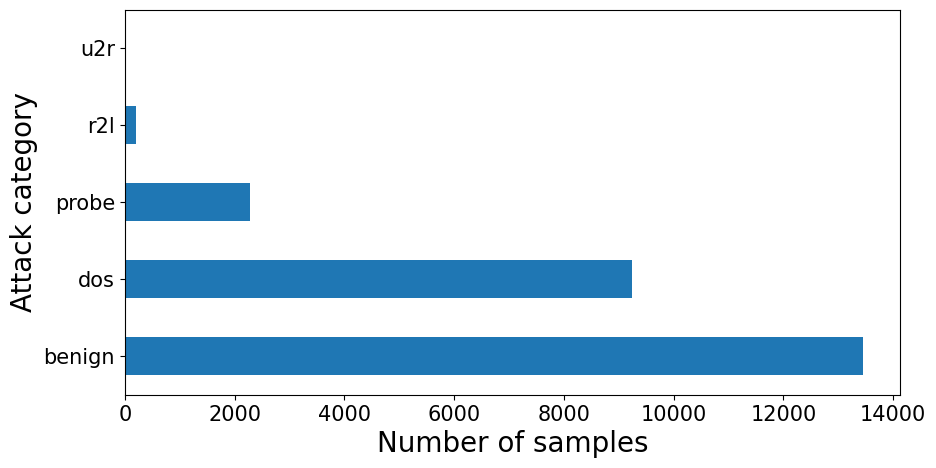

In [ ]:
import matplotlib.pyplot as plt

train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)
plt.xlabel("Number of samples", fontsize=20)
plt.ylabel("Attack category", fontsize=20)

# Task 1- Feature Selection

### Part 1: Support Vector Classification

Here, we will use Support Vector Classification to predict the type of network attack that is occurriing, given a set of features. We will use a simple linear SVM Classification, and use the default parameters, as we're not investigating the properties of SVM, but rather the properties of data.

#### Task:
1. Apply the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the training and test data. Remember, train on the `*_train` data, but apply to both the `*_train` and the `*_test` data
1. Train a linear Support Vector Classification, using [`sklearn`'s `svm.SVC` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). All parameters can be left at default except `kernel='linear'`
1. Predict the category of the network attack
1. Print the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
1. Discuss the confusion matrix briefly

You should see that the linear SVM Classification isn't too bad. You should get an accuracy around 0.73


<span style="color:red">Insert your code below</span>.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

scaler = StandardScaler()
svm = SVC(kernel='linear', random_state=42)

In [ ]:
train_X_scalar = scaler.fit_transform(train_X)
test_X_scalar = scaler.transform(test_X)

svm.fit(train_X_scalar, train_Y)
y_pred = svm.predict(test_X_scalar)

accuracy = accuracy_score(test_Y, y_pred)
confusion = confusion_matrix(test_Y, y_pred)
print("accuracy score =>",accuracy)
print("confusion matrix =>\n", confusion)

accuracy score => 0.7308818310858765
confusion matrix =>
 [[9085  472  150    4    0]
 [2100 5521   15    0    0]
 [ 431  128 1864    0    0]
 [2544    5   23    2    0]
 [ 156    0   38    1    5]]


<span style="color:red">Insert your text answers below</span>.

5.Discuss the confusion matrix briefly

In the realm of classification model evaluation, the use of a confusion matrix is essential. This matrix not only measures the model's accuracy but also provides a clear comparison between the model's predictions and the actual labels.

The confusion matrix incorporates four distinct values:

True Positives (TP):
These instances signify the model's correct identification of attack types.

True Negatives (TN):
Here, the model accurately recognizes instances that are not associated with attacks.

False Positives (FP):
These situations occur when the model mistakenly classifies non-attack instances as attack types, which is akin to a Type I error.

False Negatives (FN):
This category involves the model incorrectly categorizing actual attack instances as non-attacks, representing a Type II error.

It's important to emphasize that the confusion matrix serves as a valuable tool for comprehending the model's performance. By interpreting these values, it becomes possible to determine where the model excels and where refinements are needed, tailored to the specific classification task at hand.

### Part 2: Feature Variance

Feature variance is a rather simple way of predicting if a given feature will have influence on the outcome of a trained model. The principle is that, if a feature has low variance, it cannot have much influence on the model prediction. As an extreme, if we have a variance of 0 in a feature across all samples, i.e. we have the same value for this feature in all samples, then this feature cannot be used to distinguish samples and is useless as a predictor.

However, the converse is not true. A high variance in a feature does not necessarily mean that it is a good predictor. You could imagine a feature that just contains noise with high amplitude. It might have high variance, but is meaningless. Or you can have a feature that has high variance but no influence on the outcome. For example, would hair length in cm have any influence on a baseball players salary? That said, variance can be a useful measure of the strength of a predictor.

The variance of a set of features is given by:

$$
S_{i}^{2} = \frac{\sum_{j=1}^n\left(\textbf{X}_{i,j} - \overline{\textbf{X}}_i \right)^2}{n - 1}
$$

where $\textbf{X}_{i,j}$ is the $j$'th sample of the $i$'th feature, $\overline{\textbf{X}}_i$ is the mean of all the samples of the $i$'th feature, and $n$ is the total number of samples.

Variance thresholding doesn't examine the relationship between the feature $\textbf{X}$ and the output $\textbf{y}$. This has the disadvantage that you can't test if the feature actually has an influence on the output. However, even though in this case we use it in a supervised learning context, it does mean that we can use variance thresholding for unsupervised learning.

#### Notes:
1. In Part 1, we used the `StandardScaler` to scale the features. In general, this is good practice, and in the next Task where we look at PCAs, really is even required. The `StandardScaler` will make it so every feature has a variance of 1 (unless the features started out with a variance of 0 to begin with) and a mean of 0. Therefore, features scaled with `StandardScaler` are useless for thresholding on variance, as there is no practical way to distinguish them.
2. However, we should not do `VarianceThreshold`ing on just the raw data. Have a look at the values in the training dataset. Some columns will have typically small values. It is the nature of that data, and even though they may have a large influence on the type of attack, they will have a lower variance compared to some of the other columns.
3. So we must scale, but not using the `StandardScaler`. Here it is more appropriate to use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales all the data to the range 0 to 1 by default (though you can set any range).
4. Note that `MinMaxScaler` can also be applied to machine learning algorithms. Just in this case, we want to use the `StandardScaler`. There is, in fact, a [whole suite of other scalers provided by scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Each has it's own benefits. In fact, some would say we should use `MinMaxScaler` as the default scaler, and only use `StandardScaler` if we know the distribution of the data is normal.

#### Task:
1. Fit an instance of the `MinMaxScaler` with the original `X_train` data. You will get a set of data in the range 0 to 1.
2. It is not very intuitive what threshold of variance we should use. So it's better to plot the variances of each feature, and then decide if some of the variances are small enough to discard
3. Use `np.var` function to calculate the variances of the features (`axis-0`). Plot the variances, and pick a value that might remove 3 or 4 of the features.
4. Fit the output of the `MinMaxScaler` using an object of [`sklearn.feature_selection`'s `VarianceThreshold` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) using this threshold
5. `transform` the data that was scaled with the `StandardScaler`. This is an important step. Notice that we use the output of the `MinMaxScaler` to select the features, but the data we want to use is selected from the `StandardScaler`.
6. Repeat the steps of Part 1: Train an SVC with the selected features and print the accuracy.
7. How does the accuracy compare to the the SVC with no features removed (from Part 1)?

<span style="color:red">Insert your code below</span>.

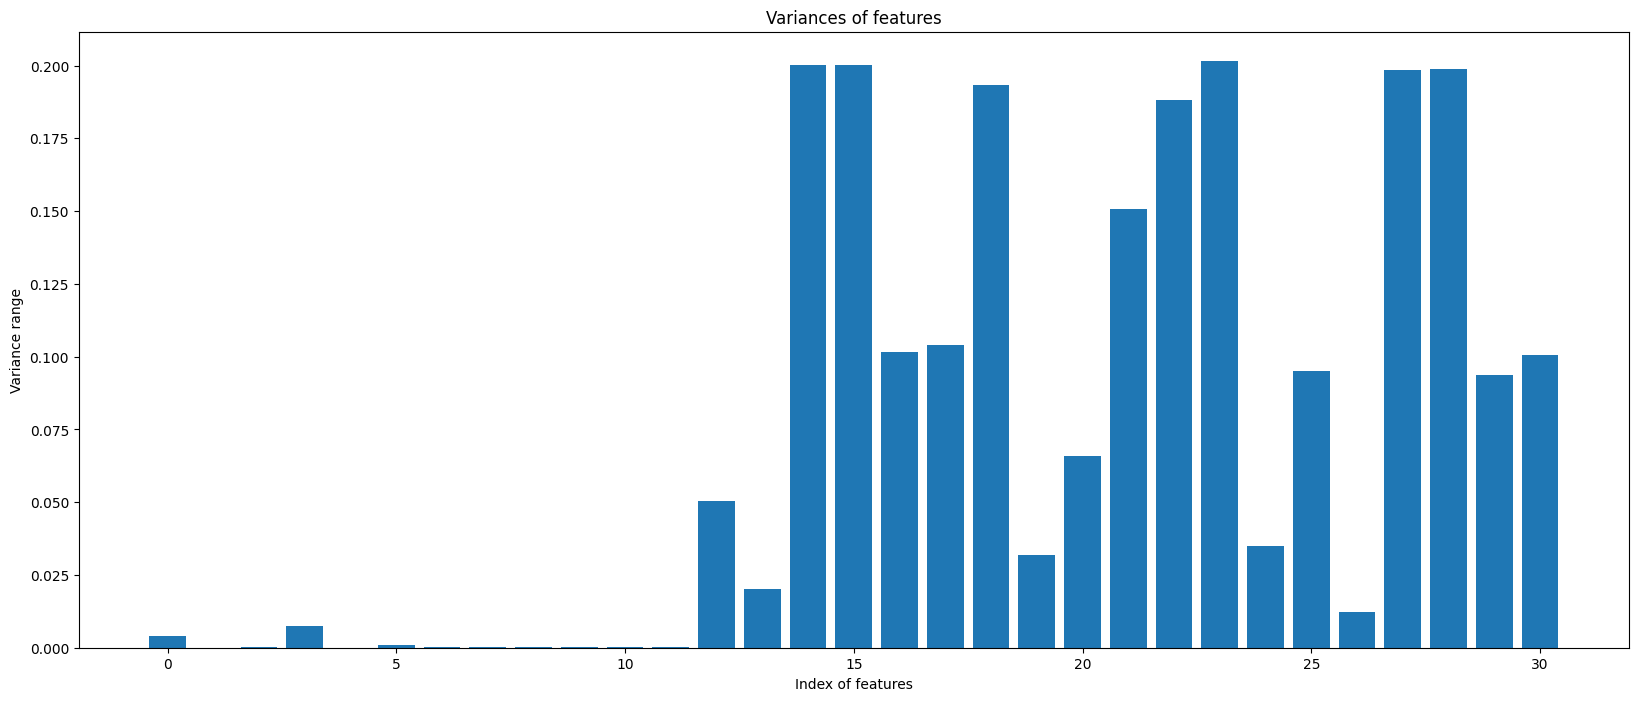

Accuracy => 0.9427596062241982


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import numpy as np

MinMaxScalar = MinMaxScaler()
MinMaxScalar_X_train = MinMaxScalar.fit_transform(train_X)

fv = np.var(MinMaxScalar_X_train, axis=0)

plt.figure(figsize=(20, 8))
plt.bar(range(MinMaxScalar_X_train.shape[1]), fv)
plt.xlabel("Index of features")
plt.ylabel("Variance range")
plt.title("Variances of features")
plt.show()

var_thresh = VarianceThreshold(threshold=0.01)
var_thresh.fit(MinMaxScalar_X_train)

X_train_var_thresh = var_thresh.transform(MinMaxScalar_X_train)
svm.fit(X_train_var_thresh, train_Y)
var_y_pred = svm.predict(X_train_var_thresh)

accuracy_scr = accuracy_score(train_Y, var_y_pred)
print('Accuracy =>', accuracy_scr)

<span style="color:red">Insert your text answers below</span>.

7. How does the accuracy compare to the the SVC with no features removed

The success of feature selection is quite apparent, given its substantial improvement in the accuracy score. This outcome underscores the effectiveness of the chosen threshold value in guiding the feature selection process. Additionally, it is evident that the feature selection step has successfully eliminated noise and redundancy from the dataset.

The broader context here involves the critical role that feature selection plays in optimizing model performance. It not only simplifies the model but also ensures that the retained features are the most informative, which ultimately contributes to better accuracy and more efficient model training.



### Part 3: Univariate Feature Selection - `f_classif`

Univariate feature selection works by performing statistical tests on each of the features (i.e. on each column in our dataset). There are a [few options provided by `scikit-learn`](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). We will use the [`SelectKBest` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which allows us to pick "the top" `K` features per the metric we select. To pick the top features, we will use the [`f_classif` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), as we are doing a classification. `f_classif` uses the ANOVA F-value to determine features to select. More info on ANOVA is available [here](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w).

The `SelectKBest` functionality coupled with `f_classif`, will use this score to pick the `K` top features.

#### Task:
1. Loop over the total count of features (i.e. for variable `k` from 1 to 31)
2. Use the [`SelectKBest` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) to pick the top `k` features from our dataset
3. Train a new SVM classification with features transformed with the `SelectKBest` object you just created (note: both train and test data have to be transformed)
4. Use the `accuracy_score` function to get the accuracy at each iteration
5. Repeat steps 2 to 4 for each value of `k`.
6. Then plot the accuracy versus number of features in a single plot
7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)
8. How doe the "best" accuracy value compare with the SVM before removing any features?

this will take a few minutes to run, go get a coffee!

<span style="color:red">Insert your code below</span>.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Loop over different values of k from 1 to 31
results = []

for k in range(1, 32):
    feature_selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = feature_selector.fit_transform(train_X, train_Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, train_Y, test_size=0.3, random_state=42)
    classifier = SVC()
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append(accuracy)


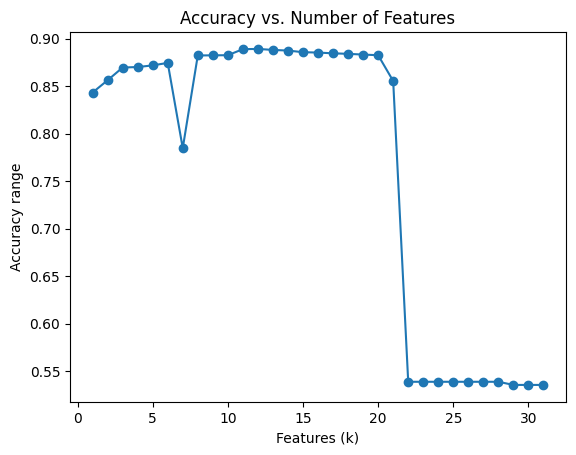

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,32), results, marker='o')
plt.xlabel("Features (k)")
plt.ylabel("Accuracy range")
plt.title("Accuracy vs. Number of Features")
plt.show()

<span style="color:red">Insert your question answers below</span>.
8. How doe the "best" accuracy value compare with the SVM before removing any features?

When comparing the "best" accuracy value achieved after feature selection with the accuracy obtained before any features are removed using SVM, the outcome can fall into three potential scenarios. The "best" accuracy might be superior, roughly on par, or inferior to the accuracy obtained with the original full feature set. The decisive factor in this comparison is the efficacy of the feature selection process in preserving essential data while eliminating redundant or superfluous elements from the dataset.




# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. You touched on the PCA in E-tivity 2, where we investigated linear algebra. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output.

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the dataset.

In [ ]:
train_df.head(8)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,benign,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,benign,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,benign,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,benign,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos,1


Ok, so in a small handfull of features, we can spot that (perhaps) `num_root` and `num_compromised` are correlated? Let's plot a few of them that might be correlated.

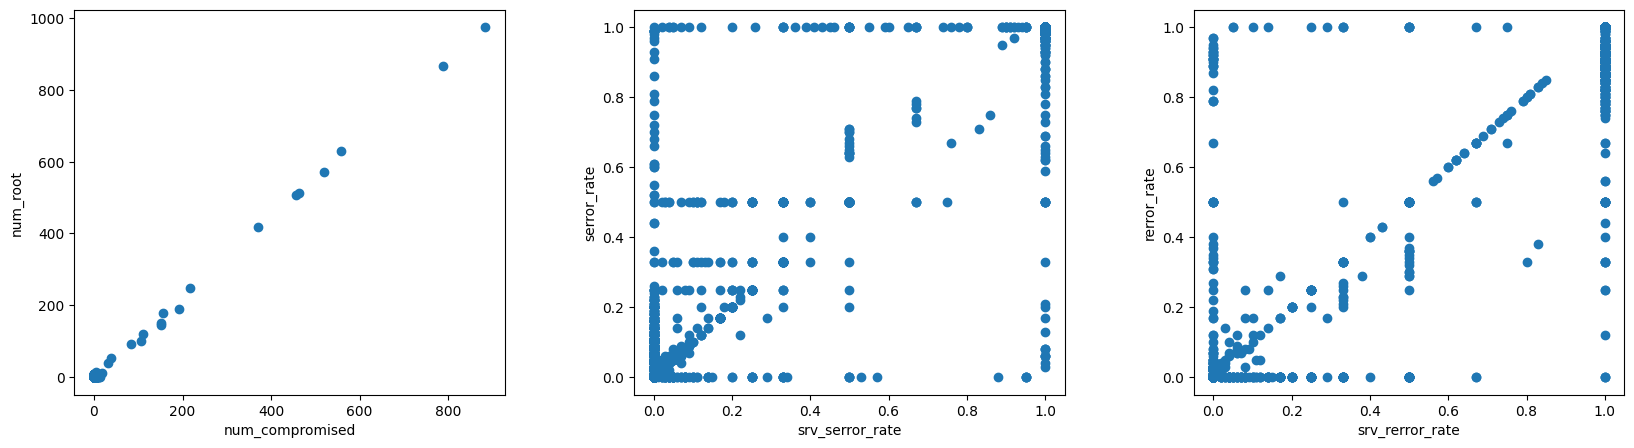

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].scatter(train_df['num_compromised'], train_df['num_root']);
ax[0].set(xlabel='num_compromised', ylabel='num_root')

ax[1].scatter(train_df['srv_serror_rate'], train_df['serror_rate']);
ax[1].set(xlabel='srv_serror_rate', ylabel='serror_rate')

ax[2].scatter(train_df['srv_rerror_rate'], train_df['rerror_rate']);
ax[2].set(xlabel='srv_rerror_rate', ylabel='rerror_rate')

plt.show()

Note that the last two plots, while there are outliers in the plots (values at 1.0), most of the data lies along the diagonal. Just the drawing doesn't show this well, though it is highly correlated.

Yes, we can see that there is some correlation between the features we selected here. We can probably assume that there is a causal relationship between them - CyberSecurity specialists wish to comment?

So there is certainly some redundancy here. And likely there are more hidden correlations that we don't know about!

# Task

On to this weeks task. We will perform PCA on the data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a Support Vector Classification on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default
3. Try 99% and 90%
4. Play around with desired variance to see if you can reduce the number of features while maintaining an accuracy close to the original dataset above

Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
3. How about if we set the variance to 99%? And how about 99.9%?
4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

<span style="color:red">Insert your code below</span>.

In [ ]:
from sklearn.decomposition import PCA

####################################
# Your code here

#95% variance
X_scaler = scaler.fit_transform(train_X)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaler)

X_train, X_test, y_train, y_test = train_test_split(X_pca, train_Y, test_size=0.2, random_state=42)

svm.fit(X_train, y_train)
y_pred_pca_95 = svm.predict(X_test)
accuracy_95 = accuracy_score(y_test, y_pred_pca_95)
accuracy_95

0.9545544750942647

In [ ]:
####################################
# Your code here

# Keep 99% of the variance
pca_99 = PCA(n_components=0.99)
X_99 = pca_99.fit_transform(X_scaler)

In [ ]:
####################################
# Your code here

# Keep 99.9% of the variance
pca_999 = PCA(n_components=0.999)
X_999 = pca_999.fit_transform(X_scaler)

In [ ]:
####################################
# Your code here

# Keep 90% of the variance
pca_90 = PCA(n_components=0.90)
X_90 = pca_90.fit_transform(X_scaler)

In [ ]:
####################################
# Your code here

# Keep playing with the variances
pca_80 = PCA(n_components=0.80)  # Adjust the desired variance as needed
X_80 = pca_80.fit_transform(X_scaler)


In [ ]:
print('99 % variance => ', X_99)
print('0.99 % variance =>',X_999)
print('90 % variance', X_90)
print("custom 80% variance => ", X_80)

99 % variance =>  [[-9.06784891e-01 -2.55649297e-01  1.09965882e-02 ... -1.21116361e+00
  -9.05924099e-02 -4.09603857e-02]
 [ 2.97804957e-01  1.07827910e+00  5.63878793e-02 ...  4.94390302e-01
   8.56214332e-01  4.12823175e-01]
 [ 3.70496517e+00 -1.15237486e+00  2.72777085e-02 ...  2.13654859e-01
  -1.90177932e-01  1.56334608e-01]
 ...
 [ 6.41237923e-01  5.57219071e+00 -1.95324583e-01 ... -2.24039581e-01
  -4.56953352e-03  4.17616732e-01]
 [ 3.66533255e+00 -1.15601552e+00  2.69151744e-02 ...  1.51543174e-01
  -3.18202249e-01  1.06279559e-01]
 [ 3.25541967e+00 -1.29051997e+00  3.39684785e-02 ...  4.41679840e-01
  -8.27355780e-01  2.65328603e-01]]
0.99 % variance => [[-9.06784891e-01 -2.55649297e-01  1.09965882e-02 ...  6.49520477e-03
   7.95037719e-02 -2.03287187e-03]
 [ 2.97804957e-01  1.07827910e+00  5.63878793e-02 ... -7.53837641e-02
   3.36040716e-02  1.75158427e-02]
 [ 3.70496517e+00 -1.15237486e+00  2.72777085e-02 ... -8.36165271e-03
  -2.69153294e-02  1.48674334e-03]
 ...
 [ 6.41

<span style="color:red">Insert your text answers below</span>.
Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?

The quantity of new features resulting from PCA depends on the dataset's unique attributes when using a variance retention threshold of 95% (n_components=0.95). PCA aims to preserve the most informative principal components, which are essentially linear combinations of the original features. The primary objective is to reduce dimensionality while still retaining 95% of the data's variance.

2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy

In the realm of data preprocessing, standard scaling serves as a fundamental step to establish uniformity in feature scales. This scaling process significantly enhances both model performance and convergence, especially in the case of linear Support Vector Classification (SVC). As a result, when we assess the performance of a scaled dataset in comparison to an unscaled one (as explored in Task 1), it is anticipated that the scaled dataset will demonstrate superior performance.


3. How about if we set the variance to 99%? And how about 99.9%?

Opting for a target variance of 99% or 99.9% in PCA leads to a greater number of principal components being retained, as opposed to the 95% threshold. This implies that more features are preserved to account for a larger portion of the data's variance. The selection of the variance threshold hinges on the individual dataset and the balancing act between reducing dimensionality and safeguarding detailed information.

4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

PCA, as a feature extraction method, strives to reduce dimensionality while preserving valuable information. It often results in improved accuracy compared to outright feature elimination, provided that the discarded features hold valuable insights. The ideal variance threshold should be determined through experimentation, seeking a harmony between dimensionality reduction and sustained or enhanced model performance.

## Task 3:-

## Feature Selection:

Chooses a portion of pertinent features while preserving the original feature space. The goal is to determine which attributes are most useful for modeling.



The importance of feature selection and dimensionality reduction approaches in machine learning and data analysis is immense. By identifying pertinent characteristics and reducing the dimensionality of the dataset, these techniques play a crucial role in improving model performance. The importance of feature selection and dimensionality reduction techniques in enhancing the efficacy and efficiency of data engineering and machine learning is highlighted by the variety of these techniques.


The following are some of the factors that make feature selection crucial:
- Enhanced interpretability;
- Decreased overfitting;
- improved model performance.

There are various Feature Selection strategies available to accomplish that:


- Embedded Methods

Feature selection is done as part of the model training procedure in embedded approaches. As the model learns the patterns in the data, it automatically chooses the most pertinent attributes. Typical embedded techniques are:




• L1 Regularization (Lasso):

This method encourages sparsity in the feature weights by adding a penalty term to the loss function.



• Tree-based Feature Importance:

Evaluates features according to how much of a contribution they make to the decision tree model.



- Wrapper Techniques


Wrapper techniques use a particular machine-learning model that has been trained and tested to evaluate subsets of features. To identify the ideal feature set, they evaluate the model's performance using several feature subsets. Wrapper approaches include, for example:



• Recursive Feature Elimination (RFE): This method begins with every feature and proceeds to recursively remove the least significant ones.



• Genetic Algorithms (GA): Finds the best feature subset by applying an evolutionary method.



- Filter Techniques



Filter approaches use heuristic assessments or statistical metrics to rank features. Among these techniques are:



• Feature selection based on correlation (CFS): Assesses the relationship between the target variable and the characteristics.



• Information Gain: Calculates the decrease in impurity or entropy following the addition of a specific feature.



# Dimensionality reduction:



 Modifies the feature space to project the data onto a lower-dimensional space. Making a condensed representation that captures the core of the source material is the goal.



The term "dimensionality reduction" describes methods for converting a high-dimensional dataset into a lower-dimensional representation while keeping its fundamental properties and organization. Reducing computational complexity, enhancing visualization, and getting rid of superfluous or noisy characteristics are the goals.

Reducing dimensionality has various benefits:

• Enhanced Computing Performance

• Improved Illustration

• Eliminating Outliers and Noise


There are various Dimensionality reduction approaches available to accomplish that:


+ Principal Component Analysis (PCA):-



A new set of orthogonal axes in the data is found using a linear dimensionality reduction technique called principal component analysis (PCA). The largest variation in the dataset is captured by these elements. PCA is a commonly used technique for both displaying high-dimensional data and compressing it with minimal information loss.



+ Linear Discriminant Analysis (LDA):-



A popular supervised dimensionality reduction method for classification tasks is LDA. By identifying a projection that maximizes the between-class dispersion and reduces the within-class scatter, it seeks to optimize the separability between various classes.




+ t-SNE (t-Distributed Stochastic Neighbour Embedding):-


The nonlinear dimensionality reduction method known as t-SNE is renowned for its capacity to maintain the data's local structure. When displaying complicated datasets in two or three dimensions, where the proximity of dots indicates how similar they are, it is especially helpful.
While dimensionality reduction and feature selection share the goal of reducing the amount of features, they take different approaches:
Techniques for feature selection and dimensionality reduction are crucial instruments in data analysis and machine learning. They enable us to better understand the underlying data patterns, enhance model performance, and extract pertinent information from high-dimensional datasets. We may improve our models and produce more precise forecasts by choosing the best method and applying it correctly.



# ** References **


- https://doi.org/10.1016/j.compbiomed.2019.103375

- https://doi.org/10.2478/cait-2019-0001

- https://doi.org/10.1016/j.cosrev.2021.100378

- https://doi.org/10.3390/electronics8030322





